# Pfizer Vaccine Sentiment Analysis

Twitter merupakan salah satu sosial media terpopuler yang banyak orang beropini dengan berbabagai macam topik. Salah satu topik tentang vaksin pfizer yang digunakan untuk menganalisis sentimen. Jadi, sekarang kita akan belajar tentang bagaimana sentiment terhadap tweet vaksin pfizer.

## 1. Import Library

Dataset ini digunakan untuk task sentiment analisis untuk vaksin pfizer yang berasal dari Kaggle. ada beberapa library yang kita gunakan untuk menyelesaikan project sederhana ini

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # data visualization library
from nltk.sentiment.vader import SentimentIntensityAnalyzer # berfungsi untuk menghitung sentimen dari sebuah kalimat
from wordcloud import WordCloud, STOPWORDS # berfungsi untuk membuat wordcloud
import nltk # berfungsi untuk melakukan preprocessing data text
import re # berfungsi untuk melakukan preprocessing data text (regular expression)
from nltk.corpus import stopwords # berfungsi untuk melakukan preprocessing data text (stopwords) 
import string # berfungsi untuk melakukan preprocessing data text (string)

nltk.download('stopwords') # download stopwords dari nltk

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yudhaislamisulistya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Membaca Dataset

In [4]:
data = pd.read_csv('vaccination_tweets.csv') # membaca dataset
data.head(10) # menampilkan 10 data pertama

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [6]:
print(data.columns) # menampilkan nama kolom
print(data.isnull().sum()) # menampilkan jumlah data yang kosong
print(len(data))

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64
8082


**Catatan**

Perhatikan disini, dataset ini terdiri 16 atribut yang masing-masing bertipe data object mulai dari id hingga is_retweet dan dalam dataset ini memiliki missing value yang berarti kita harus melakukan preprocessing terhadap dataset diatas dengan salah satu teknik (menghapus) nilai yang NA

## 3. Data Preprocessing

In [7]:
data = data.dropna() # berfungsi untuk menghapus data yang kosong
data.head(10)
print(len(data))

4749


**Catatan**

Dengan melakukan data.dropna() artinya kita akan menghapus baris yang tidak memiliki nilai atau kosong (NA). data sebelumnya berjumlah **8082** setelah dilakukan pre-processing (data cleansing) data berjumlah **4749**

In [10]:
stemmer = nltk.SnowballStemmer('english') # berfungsi untuk melakukan stemming pada data text (mengubah kata menjadi kata dasar)
stopword = set(stopwords.words('english')) # berfungsi untuk mendapatkan stopwords dari bahasa inggris

def clean(text): # berfungsi untuk melakukan preprocessing data text
    text = str(text).lower() # berfungsi untuk mengubah semua huruf menjadi huruf kecil
    text = re.sub('https?://\S+|www\.\S+', '', text) # berfungsi untuk menghapus link
    text = re.sub('<.*?>+', '', text) # berfungsi untuk menghapus tag html
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # berfungsi untuk menghapus tanda baca
    text = re.sub('\n', '', text) # berfungsi untuk menghapus enter
    text = re.sub('\w*\d\w*', '', text) # berfungsi untuk menghapus angka
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text) # berfungsi untuk menggabungkan kata
    text = [stemmer.stem(word) for word in text.split(' ')] # berfungsi untuk melakukan stemming
    text = " ".join(text) # berfungsi untuk menggabungkan kata
    return text

data['text'] = data['text'].apply(clean) # berfungsi untuk melakukan preprocessing data text

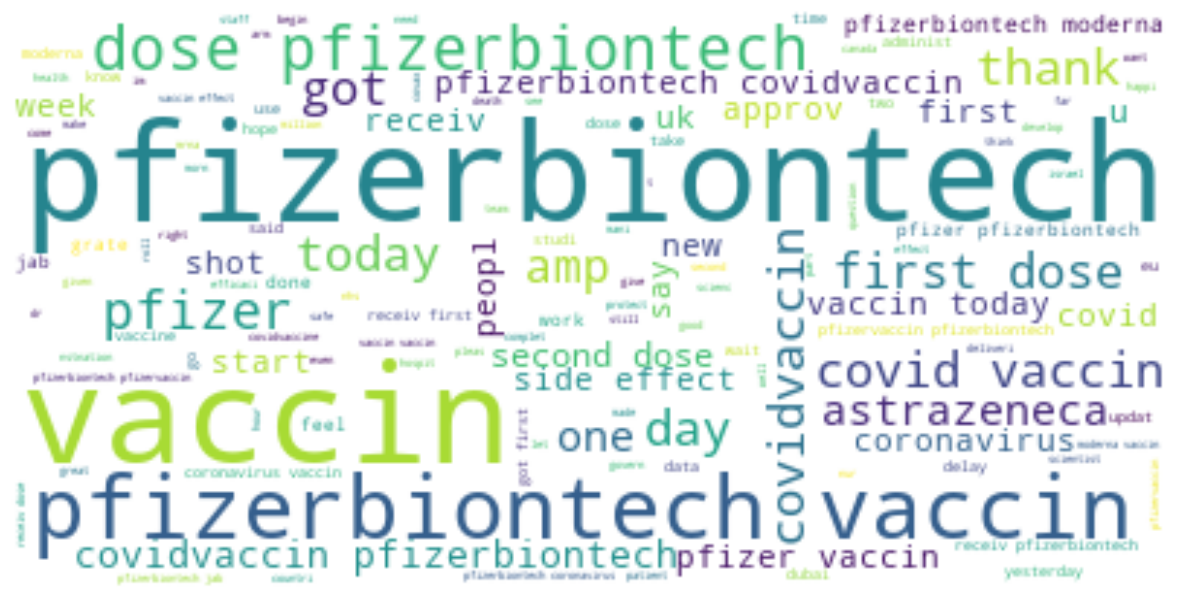

In [11]:
text = " ".join(i for i in data.text) # berfungsi untuk menggabungkan kata
stopwords = set(STOPWORDS) # berfungsi untuk mendapatkan stopwords dari wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text) # berfungsi untuk membuat wordcloud dari data text yang telah di preprocessing sebelumnya
plt.figure(figsize=(15,10)) # berfungsi untuk mengatur ukuran gambar
plt.imshow(wordcloud, interpolation='bilinear') # berfungsi untuk menampilkan gambar
plt.axis("off") # berfungsi untuk menghilangkan sumbu x dan y
plt.show() # berfungsi untuk menampilkan gambar

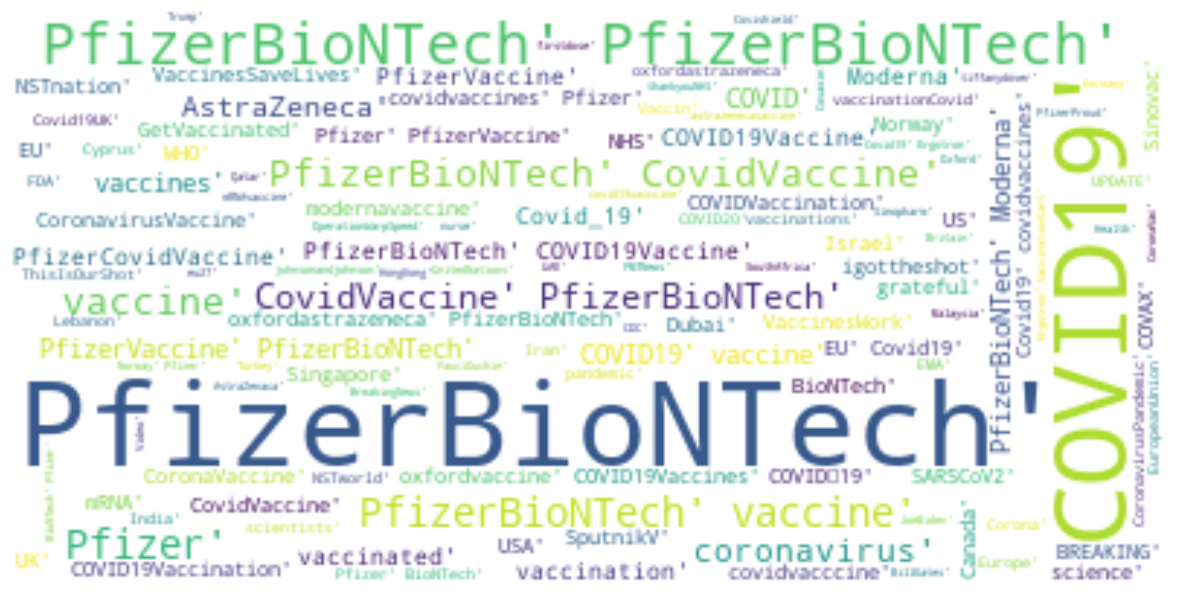

In [13]:
text = " ".join(i for i in data.hashtags) # berfungsi untuk menggabungkan kata
stopwords = set(STOPWORDS) # berfungsi untuk mendapatkan stopwords dari wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text) # berfungsi untuk membuat wordcloud dari data text yang telah di preprocessing sebelumnya
plt.figure(figsize=(15,10)) # berfungsi untuk mengatur ukuran gambar
plt.imshow(wordcloud, interpolation='bilinear') # berfungsi untuk menampilkan gambar
plt.axis("off") # berfungsi untuk menghilangkan sumbu x dan y
plt.show() # berfungsi untuk menampilkan gambar

In [14]:
data['user_verified'].value_counts() # berfungsi untuk menampilkan jumlah data yang terdapat pada kolom user_verified

False    4169
True      580
Name: user_verified, dtype: int64

## 4. Sentiment Analysis

In [15]:
nltk.download('vader_lexicon') # berfungsi untuk mendownload vader_lexicon dari nltk
sentiments = SentimentIntensityAnalyzer() # berfungsi untuk mendapatkan sentimen dari sebuah
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data.text] # berfungsi untuk mendapatkan sentimen positif dari sebuah kalimat
data['Nagative'] = [sentiments.polarity_scores(i)['neg'] for i in data.text] # berfungsi untuk mendapatkan sentimen negatif dari sebuah kalimat
data['Netral'] = [sentiments.polarity_scores(i)['neu'] for i in data.text] # berfungsi untuk mendapatkan sentimen netral dari sebuah kalimat
data = data[['text', 'Positive', 'Nagative', 'Netral']] # berfungsi untuk mengambil kolom yang dibutuhkan
data.head(10) # berfungsi untuk menampilkan 10 data pertama

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yudhaislamisulistya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,Positive,Nagative,Netral
0,folk said daikon past could treat cytokin stor...,0.252,0.000,0.748
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,0.000,1.000
6,bit sad claim fame success vaccin patriot comp...,0.353,0.166,0.481
9,covidvaccin state start get monday us say pak...,0.000,0.000,1.000
10,death close mark million peopl wait pfizerbio...,0.000,0.302,0.698
15,trump announc vaccin rollout less hoursth fir...,0.000,0.000,1.000
16,updat yellowfev amp immunitypassport part p...,0.000,0.000,1.000
17,coronavirus iran report new case death last ...,0.000,0.281,0.719
18,pfizer rake billion expens covidvaccin albertb...,0.000,0.189,0.811
19,trump administr fail deliv vaccin promis shock...,0.000,0.389,0.611


In [16]:
x = sum(data['Positive']) # berfungsi untuk menjumlahkan sentimen positif
y = sum(data['Nagative']) # berfungsi untuk menjumlahkan sentimen negatif
z = sum(data['Netral']) # berfungsi untuk menjumlahkan sentimen netral

def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        return "Positive"
    elif (b>a) and (b>c):
        return "Negative"
    else:
        return "Netral"
    
sentiment_score(x,y,z)

'Netral'

**Catatan**

Pada dataset ini pada umumnya mengandung kalimat netral dengan menjumlahkan semua skor pada data netral dan hasilnya seperti dibawah ini

In [17]:
print('Positive : ', x) # berfungsi untuk menampilkan jumlah sentimen positif
print('Negative :', y) # berfungsi untuk menampilkan jumlah sentimen negatif
print('Netral :', z) # berfungsi untuk menampilkan jumlah sentimen netral

Positive :  418.22
Negative : 188.84900000000025
Netral : 4141.934000000007


## 5. Kesimpulan

Hasil seperti diatas, bisa kita lihat setiap data point atau dokumen yang mengandung sentiment netral sangat mendominasi dataset ini dengan nilai *4141.934000000007*